In [1]:
import pandas as pd
import matplotlib.pyplot as plt

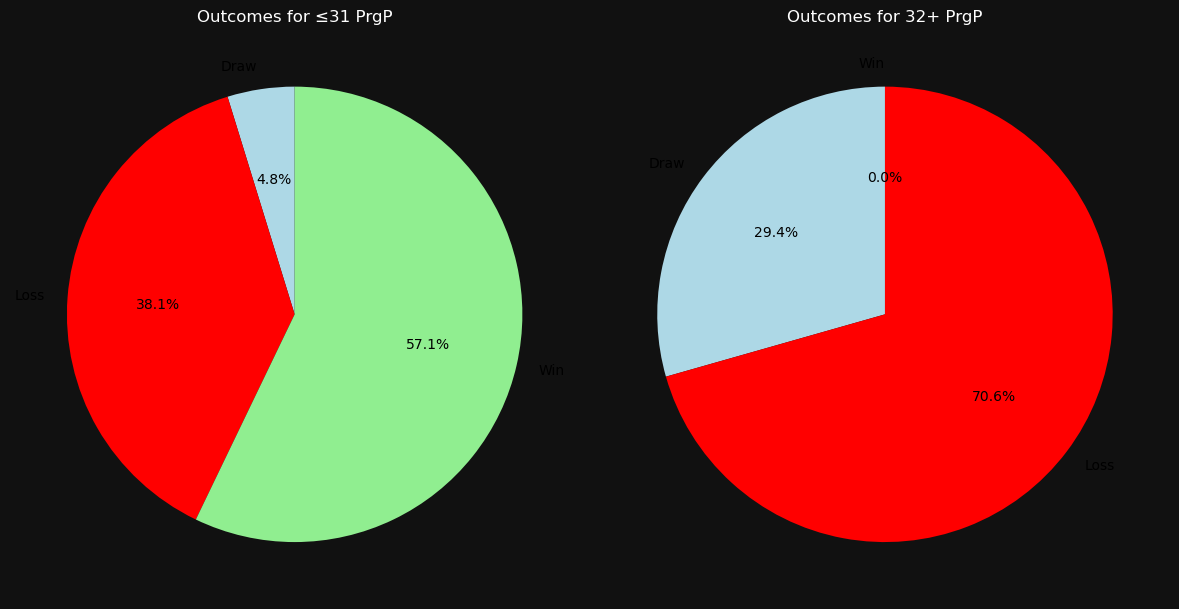

In [2]:
xls = pd.ExcelFile("wolves_passing_matchlogs.xlsx")
df = pd.read_excel(xls, sheet_name="wolves_passing_matchlogs")
df['PrgP Category'] = df['PrgP'].apply(lambda x: '≤31 PrgP' if x <= 31 else '32+ PrgP')
df['Outcome'] = df['Result'].map({'W': 'Win', 'D': 'Draw', 'L': 'Loss'})
customColors = {'Win': 'lightgreen', 'Draw': 'lightblue', 'Loss': 'red'}
plt.style.use('dark_background')
plt.rcParams.update({
    'figure.facecolor': '#111111',
    'axes.facecolor': '#111111',
    'axes.edgecolor': 'gray',
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'legend.edgecolor': 'gray',
})

outcomeCounts = df.groupby('PrgP Category')['Outcome'].value_counts().unstack().fillna(0)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), facecolor='#111111')
for i, category in enumerate(['≤31 PrgP', '32+ PrgP']):
    counts = outcomeCounts.loc[category]
    axes[i].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        colors=[customColors[label] for label in counts.index],
        startangle=90,
        textprops={'color': 'black'}
    )
    axes[i].set_title(f'Outcomes for {category}', color='white')
    axes[i].set_facecolor('#111111')

plt.tight_layout()
plt.show()

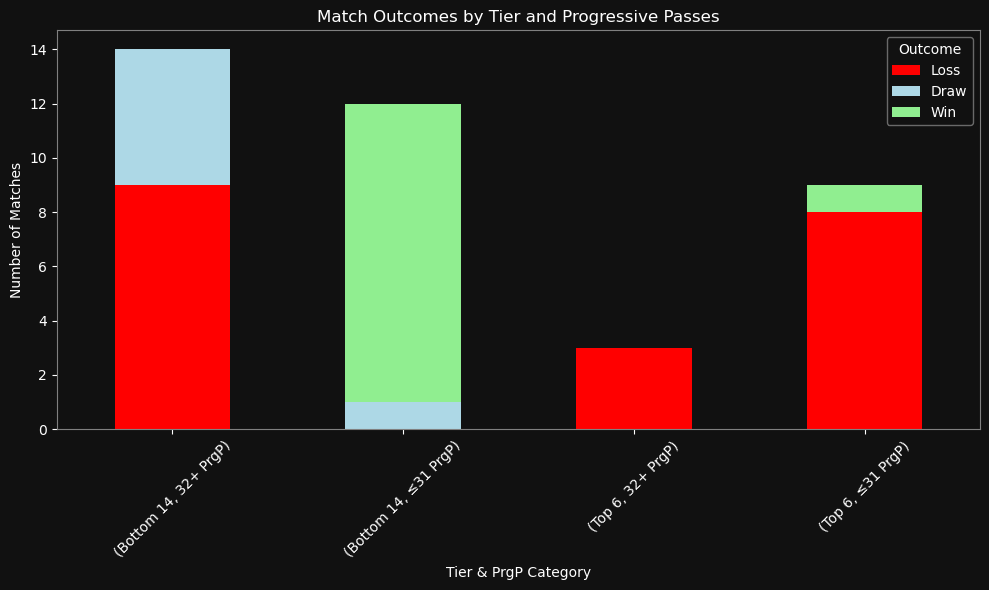

In [3]:
tierCounts = df.groupby(['Tier', 'PrgP Category', 'Outcome']).size().unstack().fillna(0)
tierCounts = tierCounts[['Loss', 'Draw', 'Win']]  # Consistent color order

ax = tierCounts.plot(
    kind='bar',
    stacked=True,
    color=[customColors['Loss'], customColors['Draw'], customColors['Win']],
    figsize=(10, 6)
)

# Dark mode styling
ax.set_facecolor('#111111')
ax.figure.set_facecolor('#111111')
ax.set_title('Match Outcomes by Tier and Progressive Passes', color='white')
ax.set_ylabel('Number of Matches', color='white')
ax.set_xlabel('Tier & PrgP Category', color='white')
ax.tick_params(axis='x', colors='white', rotation=45)
ax.tick_params(axis='y', colors='white')

for spine in ax.spines.values():
    spine.set_color('gray')

legend = ax.legend(title='Outcome', facecolor='#111111', edgecolor='gray')
plt.setp(legend.get_texts(), color='white')
plt.setp(legend.get_title(), color='white')

plt.tight_layout()
plt.show()